In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [6]:
ATMTCR_old   = pd.read_csv("../../data/setDataPredict10Subs/ATMTCR_predict.csv", delimiter='\t')
ATMTCR_old.columns =['epitope', 'CDR3b', 'binder', 'binder_pred', 'prediction']

RF_old   = pd.read_csv("../../data/setDataPredict10Subs/epiTCR_predict.csv")
NetTCR_old   = pd.read_csv("../../data/setDataPredict10Subs/NetTCR_predict.csv")
NetTCR_old =NetTCR_old.rename(columns={'peptide':'epitope'})

In [7]:
print(NetTCR_old.shape)
print(ATMTCR_old.shape)
print(RF_old.shape)

(794165, 8)
(794164, 5)
(794165, 6)


In [8]:
NetTCR_pos, NetTCR_neg = NetTCR_old[NetTCR_old['binder'] == 1], NetTCR_old[NetTCR_old['binder'] == 0]
ATMTCR_pos, ATMTCR_neg = ATMTCR_old[ATMTCR_old['binder'] == 1], ATMTCR_old[ATMTCR_old['binder'] == 0]
RF_pos, RF_neg = RF_old[RF_old['binder'] == 1], RF_old[RF_old['binder'] == 0]

In [9]:
RF_pos_fold1, RF_neg_fold1 = RF_pos.sample(n=10000, random_state=1), RF_neg.sample(n=100000, random_state=1111)
RF_pos_fold2, RF_neg_fold2 = RF_pos.sample(n=10000, random_state=2), RF_neg.sample(n=100000, random_state=1112)
RF_pos_fold3, RF_neg_fold3 = RF_pos.sample(n=10000, random_state=3), RF_neg.sample(n=100000, random_state=1113)
RF_pos_fold4, RF_neg_fold4 = RF_pos.sample(n=10000, random_state=4), RF_neg.sample(n=100000, random_state=1114)
RF_pos_fold5, RF_neg_fold5 = RF_pos.sample(n=10000, random_state=5), RF_neg.sample(n=100000, random_state=1115)
RF_pos_fold6, RF_neg_fold6 = RF_pos.sample(n=10000, random_state=6), RF_neg.sample(n=100000, random_state=1116)
RF_pos_fold7, RF_neg_fold7 = RF_pos.sample(n=10000, random_state=7), RF_neg.sample(n=100000, random_state=117)
RF_pos_fold8, RF_neg_fold8 = RF_pos.sample(n=10000, random_state=8), RF_neg.sample(n=100000, random_state=1118)
RF_pos_fold9, RF_neg_fold9 = RF_pos.sample(n=10000, random_state=9), RF_neg.sample(n=100000, random_state=119)
RF_pos_fold10,RF_neg_fold10 =RF_pos.sample(n=10000, random_state=10),RF_neg.sample(n=100000, random_state=110)

In [10]:
RF_pos_fold1, RF_neg_fold1 = RF_pos.sample(n=10000, random_state=1), RF_neg.sample(n=100000, random_state=1111)
RF_pos_fold2, RF_neg_fold2 = RF_pos.sample(n=10000, random_state=2), RF_neg.sample(n=100000, random_state=1112)
RF_pos_fold3, RF_neg_fold3 = RF_pos.sample(n=10000, random_state=3), RF_neg.sample(n=100000, random_state=1113)
RF_pos_fold4, RF_neg_fold4 = RF_pos.sample(n=10000, random_state=4), RF_neg.sample(n=100000, random_state=1114)
RF_pos_fold5, RF_neg_fold5 = RF_pos.sample(n=10000, random_state=5), RF_neg.sample(n=100000, random_state=1115)
RF_pos_fold6, RF_neg_fold6 = RF_pos.sample(n=10000, random_state=6), RF_neg.sample(n=100000, random_state=1116)
RF_pos_fold7, RF_neg_fold7 = RF_pos.sample(n=10000, random_state=7), RF_neg.sample(n=100000, random_state=117)
RF_pos_fold8, RF_neg_fold8 = RF_pos.sample(n=10000, random_state=8), RF_neg.sample(n=100000, random_state=1118)
RF_pos_fold9, RF_neg_fold9 = RF_pos.sample(n=10000, random_state=9), RF_neg.sample(n=100000, random_state=119)
RF_pos_fold10,RF_neg_fold10 =RF_pos.sample(n=10000, random_state=10),RF_neg.sample(n=100000, random_state=110)

In [11]:

RF_fold1 = pd.concat([RF_pos_fold1, RF_neg_fold1])
RF_fold2 = pd.concat([RF_pos_fold2, RF_neg_fold2])
RF_fold3 = pd.concat([RF_pos_fold3, RF_neg_fold3])
RF_fold4 = pd.concat([RF_pos_fold4, RF_neg_fold4])
RF_fold5 = pd.concat([RF_pos_fold5, RF_neg_fold5])
RF_fold6 = pd.concat([RF_pos_fold6, RF_neg_fold6])
RF_fold7 = pd.concat([RF_pos_fold7, RF_neg_fold7])
RF_fold8 = pd.concat([RF_pos_fold8, RF_neg_fold8])
RF_fold9 = pd.concat([RF_pos_fold9, RF_neg_fold9])
RF_fold10 =pd.concat([RF_pos_fold10, RF_neg_fold10])

In [12]:
ATMTCR_fold1_v2 = RF_fold1.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
ATMTCR_fold2_v2 = RF_fold2.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
ATMTCR_fold3_v2 = RF_fold3.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
ATMTCR_fold4_v2 = RF_fold4.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
ATMTCR_fold5_v2 = RF_fold5.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
ATMTCR_fold6_v2 = RF_fold6.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
ATMTCR_fold7_v2 = RF_fold7.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
ATMTCR_fold8_v2 = RF_fold8.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
ATMTCR_fold9_v2 = RF_fold9.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
ATMTCR_fold10_v2=RF_fold10.merge(ATMTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])


ATMTCR_fold1_v2 = ATMTCR_fold1_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]
ATMTCR_fold2_v2 = ATMTCR_fold2_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]
ATMTCR_fold3_v2 = ATMTCR_fold3_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]
ATMTCR_fold4_v2 = ATMTCR_fold4_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]
ATMTCR_fold5_v2 = ATMTCR_fold5_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]
ATMTCR_fold6_v2 = ATMTCR_fold6_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]
ATMTCR_fold7_v2 = ATMTCR_fold7_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]
ATMTCR_fold8_v2 = ATMTCR_fold8_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]
ATMTCR_fold9_v2 = ATMTCR_fold9_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]
ATMTCR_fold10_v2 = ATMTCR_fold10_v2[["CDR3b", "epitope", "binder", "prediction", "binder_pred_y"]]

ATMTCR_fold1_v2 = ATMTCR_fold1_v2.rename(columns={"binder_pred_y": "binder_pred"})
ATMTCR_fold2_v2 = ATMTCR_fold2_v2.rename(columns={"binder_pred_y": "binder_pred"})
ATMTCR_fold3_v2 = ATMTCR_fold3_v2.rename(columns={"binder_pred_y": "binder_pred"})
ATMTCR_fold4_v2 = ATMTCR_fold4_v2.rename(columns={"binder_pred_y": "binder_pred"})
ATMTCR_fold5_v2 = ATMTCR_fold5_v2.rename(columns={"binder_pred_y": "binder_pred"})
ATMTCR_fold6_v2 = ATMTCR_fold6_v2.rename(columns={"binder_pred_y": "binder_pred"})
ATMTCR_fold7_v2 = ATMTCR_fold7_v2.rename(columns={"binder_pred_y": "binder_pred"})
ATMTCR_fold8_v2 = ATMTCR_fold8_v2.rename(columns={"binder_pred_y": "binder_pred"})
ATMTCR_fold9_v2 = ATMTCR_fold9_v2.rename(columns={"binder_pred_y": "binder_pred"})
ATMTCR_fold10_v2 = ATMTCR_fold10_v2.rename(columns={"binder_pred_y": "binder_pred"})

print(ATMTCR_fold1_v2 .shape)
print(ATMTCR_fold2_v2 .shape)
print(ATMTCR_fold3_v2 .shape)
print(ATMTCR_fold4_v2 .shape)
print(ATMTCR_fold5_v2 .shape)
print(ATMTCR_fold6_v2 .shape)
print(ATMTCR_fold7_v2 .shape)
print(ATMTCR_fold8_v2 .shape)
print(ATMTCR_fold9_v2 .shape)
print(ATMTCR_fold10_v2.shape)

(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)


In [13]:
NetTCR_fold1_v2 = RF_fold1.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
NetTCR_fold2_v2 = RF_fold2.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
NetTCR_fold3_v2 = RF_fold3.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
NetTCR_fold4_v2 = RF_fold4.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
NetTCR_fold5_v2 = RF_fold5.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
NetTCR_fold6_v2 = RF_fold6.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
NetTCR_fold7_v2 = RF_fold7.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
NetTCR_fold8_v2 = RF_fold8.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
NetTCR_fold9_v2 = RF_fold9.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])
NetTCR_fold10_v2=RF_fold10.merge(NetTCR_old, how ='inner', on =['CDR3b', 'epitope', "binder"])


NetTCR_fold1_v2 = NetTCR_fold1_v2[["CDR3b", "epitope", "binder", "prediction", ]]
NetTCR_fold2_v2 = NetTCR_fold2_v2[["CDR3b", "epitope", "binder", "prediction", ]]
NetTCR_fold3_v2 = NetTCR_fold3_v2[["CDR3b", "epitope", "binder", "prediction", ]]
NetTCR_fold4_v2 = NetTCR_fold4_v2[["CDR3b", "epitope", "binder", "prediction", ]]
NetTCR_fold5_v2 = NetTCR_fold5_v2[["CDR3b", "epitope", "binder", "prediction", ]]
NetTCR_fold6_v2 = NetTCR_fold6_v2[["CDR3b", "epitope", "binder", "prediction", ]]
NetTCR_fold7_v2 = NetTCR_fold7_v2[["CDR3b", "epitope", "binder", "prediction", ]]
NetTCR_fold8_v2 = NetTCR_fold8_v2[["CDR3b", "epitope", "binder", "prediction", ]]
NetTCR_fold9_v2 = NetTCR_fold9_v2[["CDR3b", "epitope", "binder", "prediction", ]]
NetTCR_fold10_v2 = NetTCR_fold10_v2[["CDR3b", "epitope", "binder", "prediction"]]

NetTCR_fold1_v2['binder_pred'] = np.where(NetTCR_fold1_v2['prediction'] >= 0.5, 1, 0)  
NetTCR_fold2_v2['binder_pred'] = np.where(NetTCR_fold2_v2['prediction'] >= 0.5, 1, 0)
NetTCR_fold3_v2['binder_pred'] = np.where(NetTCR_fold3_v2['prediction'] >= 0.5, 1, 0)
NetTCR_fold4_v2['binder_pred'] = np.where(NetTCR_fold4_v2['prediction'] >= 0.5, 1, 0)
NetTCR_fold5_v2['binder_pred'] = np.where(NetTCR_fold5_v2['prediction'] >= 0.5, 1, 0)
NetTCR_fold6_v2['binder_pred'] = np.where(NetTCR_fold6_v2['prediction'] >= 0.5, 1, 0)
NetTCR_fold7_v2['binder_pred'] = np.where(NetTCR_fold7_v2['prediction'] >= 0.5, 1, 0)
NetTCR_fold8_v2['binder_pred'] = np.where(NetTCR_fold8_v2['prediction'] >= 0.5, 1, 0)
NetTCR_fold9_v2['binder_pred'] = np.where(NetTCR_fold9_v2['prediction'] >= 0.5, 1, 0)
NetTCR_fold10_v2['binder_pred'] = np.where(NetTCR_fold10_v2['prediction'] >= 0.5, 1, 0)

print(NetTCR_fold1_v2 .shape)
print(NetTCR_fold2_v2 .shape)
print(NetTCR_fold3_v2 .shape)
print(NetTCR_fold4_v2 .shape)
print(NetTCR_fold5_v2 .shape)
print(NetTCR_fold6_v2 .shape)
print(NetTCR_fold7_v2 .shape)
print(NetTCR_fold8_v2 .shape)
print(NetTCR_fold9_v2 .shape)
print(NetTCR_fold10_v2.shape)

(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)
(110000, 5)


In [16]:
ATMTCR_fold1_v2.to_csv ("../../data/get10Subsampling/ATMTCR/ATMTCR_fold1.csv", index=False)
ATMTCR_fold2_v2.to_csv ("../../data/get10Subsampling/ATMTCR/ATMTCR_fold2.csv", index=False)
ATMTCR_fold3_v2.to_csv ("../../data/get10Subsampling/ATMTCR/ATMTCR_fold3.csv", index=False)
ATMTCR_fold4_v2.to_csv ("../../data/get10Subsampling/ATMTCR/ATMTCR_fold4.csv", index=False)
ATMTCR_fold5_v2.to_csv ("../../data/get10Subsampling/ATMTCR/ATMTCR_fold5.csv", index=False)
ATMTCR_fold6_v2.to_csv ("../../data/get10Subsampling/ATMTCR/ATMTCR_fold6.csv", index=False)
ATMTCR_fold7_v2.to_csv ("../../data/get10Subsampling/ATMTCR/ATMTCR_fold7.csv", index=False)
ATMTCR_fold8_v2.to_csv ("../../data/get10Subsampling/ATMTCR/ATMTCR_fold8.csv", index=False)
ATMTCR_fold9_v2.to_csv ("../../data/get10Subsampling/ATMTCR/ATMTCR_fold9.csv", index=False)
ATMTCR_fold10_v2.to_csv("../../data/get10Subsampling/ATMTCR/ATMTCR_fold10.csv", index=False)

In [17]:
NetTCR_fold1_v2.to_csv ("../../data/get10Subsampling/NetTCR/NetTCR_fold1.csv", index=False)
NetTCR_fold2_v2.to_csv ("../../data/get10Subsampling/NetTCR/NetTCR_fold2.csv", index=False)
NetTCR_fold3_v2.to_csv ("../../data/get10Subsampling/NetTCR/NetTCR_fold3.csv", index=False)
NetTCR_fold4_v2.to_csv ("../../data/get10Subsampling/NetTCR/NetTCR_fold4.csv", index=False)
NetTCR_fold5_v2.to_csv ("../../data/get10Subsampling/NetTCR/NetTCR_fold5.csv", index=False)
NetTCR_fold6_v2.to_csv ("../../data/get10Subsampling/NetTCR/NetTCR_fold6.csv", index=False)
NetTCR_fold7_v2.to_csv ("../../data/get10Subsampling/NetTCR/NetTCR_fold7.csv", index=False)
NetTCR_fold8_v2.to_csv ("../../data/get10Subsampling/NetTCR/NetTCR_fold8.csv", index=False)
NetTCR_fold9_v2.to_csv ("../../data/get10Subsampling/NetTCR/NetTCR_fold9.csv", index=False)
NetTCR_fold10_v2.to_csv("../../data/get10Subsampling/NetTCR/NetTCR_fold10.csv", index=False)

In [18]:
RF_fold1.to_csv ("../../data/get10Subsampling/epiTCR/RF_fold1.csv", index=False)
RF_fold2.to_csv ("../../data/get10Subsampling/epiTCR/RF_fold2.csv", index=False)
RF_fold3.to_csv ("../../data/get10Subsampling/epiTCR/RF_fold3.csv", index=False)
RF_fold4.to_csv ("../../data/get10Subsampling/epiTCR/RF_fold4.csv", index=False)
RF_fold5.to_csv ("../../data/get10Subsampling/epiTCR/RF_fold5.csv", index=False)
RF_fold6.to_csv ("../../data/get10Subsampling/epiTCR/RF_fold6.csv", index=False)
RF_fold7.to_csv ("../../data/get10Subsampling/epiTCR/RF_fold7.csv", index=False)
RF_fold8.to_csv ("../../data/get10Subsampling/epiTCR/RF_fold8.csv", index=False)
RF_fold9.to_csv ("../../data/get10Subsampling/epiTCR/RF_fold9.csv", index=False)
RF_fold10.to_csv("../../data/get10Subsampling/epiTCR/RF_fold10.csv", index= False)

In [19]:
prob01_nettcr = NetTCR_fold1_v2["prediction"]
prob02_nettcr = NetTCR_fold2_v2["prediction"]
prob03_nettcr = NetTCR_fold3_v2["prediction"]
prob04_nettcr = NetTCR_fold4_v2["prediction"]
prob05_nettcr = NetTCR_fold5_v2["prediction"]
prob06_nettcr = NetTCR_fold6_v2["prediction"]
prob07_nettcr = NetTCR_fold7_v2["prediction"]
prob08_nettcr = NetTCR_fold8_v2["prediction"]
prob09_nettcr = NetTCR_fold9_v2["prediction"]
prob10_nettcr = NetTCR_fold10_v2["prediction"]


y_test01_nettcr = NetTCR_fold1_v2["binder"].to_numpy()
y_test02_nettcr = NetTCR_fold2_v2["binder"].to_numpy()
y_test03_nettcr = NetTCR_fold3_v2["binder"].to_numpy()
y_test04_nettcr = NetTCR_fold4_v2["binder"].to_numpy()
y_test05_nettcr = NetTCR_fold5_v2["binder"].to_numpy()
y_test06_nettcr = NetTCR_fold6_v2["binder"].to_numpy()
y_test07_nettcr = NetTCR_fold7_v2["binder"].to_numpy()
y_test08_nettcr = NetTCR_fold8_v2["binder"].to_numpy()
y_test09_nettcr = NetTCR_fold9_v2["binder"].to_numpy()
y_test10_nettcr = NetTCR_fold10_v2["binder"].to_numpy()

fpr01_nettcr, tpr01_nettcr, thresholds = roc_curve(y_test01_nettcr, prob01_nettcr, drop_intermediate=False)
fpr02_nettcr, tpr02_nettcr, thresholds = roc_curve(y_test02_nettcr, prob02_nettcr, drop_intermediate=False)
fpr03_nettcr, tpr03_nettcr, thresholds = roc_curve(y_test03_nettcr, prob03_nettcr, drop_intermediate=False)
fpr04_nettcr, tpr04_nettcr, thresholds = roc_curve(y_test04_nettcr, prob04_nettcr, drop_intermediate=False)
fpr05_nettcr, tpr05_nettcr, thresholds = roc_curve(y_test05_nettcr, prob05_nettcr, drop_intermediate=False)
fpr06_nettcr, tpr06_nettcr, thresholds = roc_curve(y_test06_nettcr, prob06_nettcr, drop_intermediate=False)
fpr07_nettcr, tpr07_nettcr, thresholds = roc_curve(y_test07_nettcr, prob07_nettcr, drop_intermediate=False)
fpr08_nettcr, tpr08_nettcr, thresholds = roc_curve(y_test08_nettcr, prob08_nettcr, drop_intermediate=False)
fpr09_nettcr, tpr09_nettcr, thresholds = roc_curve(y_test09_nettcr, prob09_nettcr, drop_intermediate=False)
fpr10_nettcr, tpr10_nettcr, thresholds = roc_curve(y_test10_nettcr, prob10_nettcr, drop_intermediate=False)

auc_score01_nettcr = auc(fpr01_nettcr, tpr01_nettcr)
auc_score02_nettcr = auc(fpr02_nettcr, tpr02_nettcr)
auc_score03_nettcr = auc(fpr03_nettcr, tpr03_nettcr)
auc_score04_nettcr = auc(fpr04_nettcr, tpr04_nettcr)
auc_score05_nettcr = auc(fpr05_nettcr, tpr05_nettcr)
auc_score06_nettcr = auc(fpr06_nettcr, tpr06_nettcr)
auc_score07_nettcr = auc(fpr07_nettcr, tpr07_nettcr)
auc_score08_nettcr = auc(fpr08_nettcr, tpr08_nettcr)
auc_score09_nettcr = auc(fpr09_nettcr, tpr09_nettcr)
auc_score10_nettcr = auc(fpr10_nettcr, tpr10_nettcr)

aucs_nettcr = [  auc_score01_nettcr,auc_score02_nettcr,auc_score03_nettcr,auc_score04_nettcr,
                auc_score05_nettcr,auc_score06_nettcr,auc_score07_nettcr,auc_score08_nettcr,
                auc_score09_nettcr,auc_score10_nettcr]

In [20]:
prob01_atmtcr = ATMTCR_fold1_v2["prediction"]
prob02_atmtcr = ATMTCR_fold2_v2["prediction"]
prob03_atmtcr = ATMTCR_fold3_v2["prediction"]
prob04_atmtcr = ATMTCR_fold4_v2["prediction"]
prob05_atmtcr = ATMTCR_fold5_v2["prediction"]
prob06_atmtcr = ATMTCR_fold6_v2["prediction"]
prob07_atmtcr = ATMTCR_fold7_v2["prediction"]
prob08_atmtcr = ATMTCR_fold8_v2["prediction"]
prob09_atmtcr = ATMTCR_fold9_v2["prediction"]
prob10_atmtcr = ATMTCR_fold10_v2["prediction"]


y_test01_atmtcr = NetTCR_fold1_v2["binder"].to_numpy()
y_test02_atmtcr = NetTCR_fold2_v2["binder"].to_numpy()
y_test03_atmtcr = NetTCR_fold3_v2["binder"].to_numpy()
y_test04_atmtcr = NetTCR_fold4_v2["binder"].to_numpy()
y_test05_atmtcr = NetTCR_fold5_v2["binder"].to_numpy()
y_test06_atmtcr = NetTCR_fold6_v2["binder"].to_numpy()
y_test07_atmtcr = NetTCR_fold7_v2["binder"].to_numpy()
y_test08_atmtcr = NetTCR_fold8_v2["binder"].to_numpy()
y_test09_atmtcr = NetTCR_fold9_v2["binder"].to_numpy()
y_test10_atmtcr = NetTCR_fold10_v2["binder"].to_numpy()

fpr01_atmtcr, tpr01_atmtcr, thresholds = roc_curve(y_test01_atmtcr, prob01_atmtcr, drop_intermediate=False)
fpr02_atmtcr, tpr02_atmtcr, thresholds = roc_curve(y_test02_atmtcr, prob02_atmtcr, drop_intermediate=False)
fpr03_atmtcr, tpr03_atmtcr, thresholds = roc_curve(y_test03_atmtcr, prob03_atmtcr, drop_intermediate=False)
fpr04_atmtcr, tpr04_atmtcr, thresholds = roc_curve(y_test04_atmtcr, prob04_atmtcr, drop_intermediate=False)
fpr05_atmtcr, tpr05_atmtcr, thresholds = roc_curve(y_test05_atmtcr, prob05_atmtcr, drop_intermediate=False)
fpr06_atmtcr, tpr06_atmtcr, thresholds = roc_curve(y_test06_atmtcr, prob06_atmtcr, drop_intermediate=False)
fpr07_atmtcr, tpr07_atmtcr, thresholds = roc_curve(y_test07_atmtcr, prob07_atmtcr, drop_intermediate=False)
fpr08_atmtcr, tpr08_atmtcr, thresholds = roc_curve(y_test08_atmtcr, prob08_atmtcr, drop_intermediate=False)
fpr09_atmtcr, tpr09_atmtcr, thresholds = roc_curve(y_test09_atmtcr, prob09_atmtcr, drop_intermediate=False)
fpr10_atmtcr, tpr10_atmtcr, thresholds = roc_curve(y_test10_atmtcr, prob10_atmtcr, drop_intermediate=False)

auc_score01_atmtcr = auc(fpr01_atmtcr, tpr01_atmtcr)
auc_score02_atmtcr = auc(fpr02_atmtcr, tpr02_atmtcr)
auc_score03_atmtcr = auc(fpr03_atmtcr, tpr03_atmtcr)
auc_score04_atmtcr = auc(fpr04_atmtcr, tpr04_atmtcr)
auc_score05_atmtcr = auc(fpr05_atmtcr, tpr05_atmtcr)
auc_score06_atmtcr = auc(fpr06_atmtcr, tpr06_atmtcr)
auc_score07_atmtcr = auc(fpr07_atmtcr, tpr07_atmtcr)
auc_score08_atmtcr = auc(fpr08_atmtcr, tpr08_atmtcr)
auc_score09_atmtcr = auc(fpr09_atmtcr, tpr09_atmtcr)
auc_score10_atmtcr = auc(fpr10_atmtcr, tpr10_atmtcr)

aucs_atmtcr = [  auc_score01_atmtcr,auc_score02_atmtcr,auc_score03_atmtcr,auc_score04_atmtcr,
                auc_score05_atmtcr,auc_score06_atmtcr,auc_score07_atmtcr,auc_score08_atmtcr,
                auc_score09_atmtcr,auc_score10_atmtcr]

In [21]:
prob01_rf = RF_fold1["predict_proba"]
prob02_rf = RF_fold2["predict_proba"]
prob03_rf = RF_fold3["predict_proba"]
prob04_rf = RF_fold4["predict_proba"]
prob05_rf = RF_fold5["predict_proba"]
prob06_rf = RF_fold6["predict_proba"]
prob07_rf = RF_fold7["predict_proba"]
prob08_rf = RF_fold8["predict_proba"]
prob09_rf = RF_fold9["predict_proba"]
prob10_rf = RF_fold10["predict_proba"]

y_test01_rf = RF_fold1["binder"].to_numpy()
y_test02_rf = RF_fold2["binder"].to_numpy()
y_test03_rf = RF_fold3["binder"].to_numpy()
y_test04_rf = RF_fold4["binder"].to_numpy()
y_test05_rf = RF_fold5["binder"].to_numpy()
y_test06_rf = RF_fold6["binder"].to_numpy()
y_test07_rf = RF_fold7["binder"].to_numpy()
y_test08_rf = RF_fold8["binder"].to_numpy()
y_test09_rf = RF_fold9["binder"].to_numpy()
y_test10_rf = RF_fold10["binder"].to_numpy()

fpr01_rf, tpr01_rf, thresholds = roc_curve(y_test01_rf, prob01_rf, drop_intermediate=False)
fpr02_rf, tpr02_rf, thresholds = roc_curve(y_test02_rf, prob02_rf, drop_intermediate=False)
fpr03_rf, tpr03_rf, thresholds = roc_curve(y_test03_rf, prob03_rf, drop_intermediate=False)
fpr04_rf, tpr04_rf, thresholds = roc_curve(y_test04_rf, prob04_rf, drop_intermediate=False)
fpr05_rf, tpr05_rf, thresholds = roc_curve(y_test05_rf, prob05_rf, drop_intermediate=False)
fpr06_rf, tpr06_rf, thresholds = roc_curve(y_test06_rf, prob06_rf, drop_intermediate=False)
fpr07_rf, tpr07_rf, thresholds = roc_curve(y_test07_rf, prob07_rf, drop_intermediate=False)
fpr08_rf, tpr08_rf, thresholds = roc_curve(y_test08_rf, prob08_rf, drop_intermediate=False)
fpr09_rf, tpr09_rf, thresholds = roc_curve(y_test09_rf, prob09_rf, drop_intermediate=False)
fpr10_rf, tpr10_rf, thresholds = roc_curve(y_test10_rf, prob10_rf, drop_intermediate=False)

auc_score01_rf = auc(fpr01_rf, tpr01_rf)
auc_score02_rf = auc(fpr02_rf, tpr02_rf)
auc_score03_rf = auc(fpr03_rf, tpr03_rf)
auc_score04_rf = auc(fpr04_rf, tpr04_rf)
auc_score05_rf = auc(fpr05_rf, tpr05_rf)
auc_score06_rf = auc(fpr06_rf, tpr06_rf)
auc_score07_rf = auc(fpr07_rf, tpr07_rf)
auc_score08_rf = auc(fpr08_rf, tpr08_rf)
auc_score09_rf = auc(fpr09_rf, tpr09_rf)
auc_score10_rf = auc(fpr10_rf, tpr10_rf)

aucs_rf = [  auc_score01_rf,auc_score02_rf,auc_score03_rf,auc_score04_rf,
                auc_score05_rf,auc_score06_rf,auc_score07_rf,auc_score08_rf,
                auc_score09_rf,auc_score10_rf]

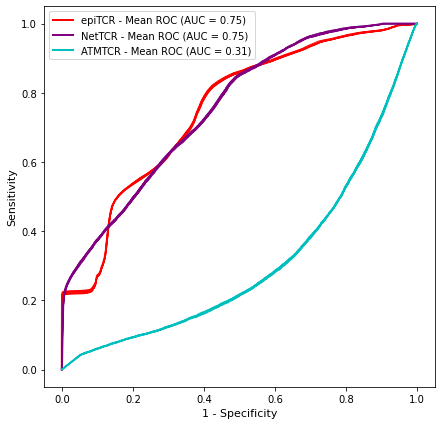

In [23]:
#linestyle="dotted"
    
fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111)

ax.plot(fpr01_rf , tpr01_rf , label = 'epiTCR - Mean ROC (AUC = 0.75)',linewidth=2, color="r")
ax.plot(fpr02_rf , tpr02_rf , linewidth=1, color="r")
ax.plot(fpr03_rf , tpr03_rf , linewidth=1, color="r")
ax.plot(fpr04_rf , tpr04_rf , linewidth=1, color="r")
ax.plot(fpr05_rf , tpr05_rf , linewidth=1, color="r")
ax.plot(fpr06_rf , tpr06_rf , linewidth=1, color="r")
ax.plot(fpr07_rf , tpr07_rf , linewidth=1, color="r")
ax.plot(fpr08_rf , tpr08_rf , linewidth=1, color="r")
ax.plot(fpr09_rf , tpr09_rf , linewidth=1, color="r")
ax.plot(fpr10_rf , tpr10_rf , linewidth=1, color="r")

ax.plot(fpr01_nettcr , tpr01_nettcr , label = 'NetTCR - Mean ROC (AUC = 0.75)',linewidth=2, color="purple")
ax.plot(fpr02_nettcr , tpr02_nettcr , linewidth=1, color="purple")
ax.plot(fpr03_nettcr , tpr03_nettcr , linewidth=1, color="purple")
ax.plot(fpr04_nettcr , tpr04_nettcr , linewidth=1, color="purple")
ax.plot(fpr05_nettcr , tpr05_nettcr , linewidth=1, color="purple")
ax.plot(fpr06_nettcr , tpr06_nettcr , linewidth=1, color="purple")
ax.plot(fpr07_nettcr , tpr07_nettcr , linewidth=1, color="purple")
ax.plot(fpr08_nettcr , tpr08_nettcr , linewidth=1, color="purple")
ax.plot(fpr09_nettcr , tpr09_nettcr , linewidth=1, color="purple")
ax.plot(fpr10_nettcr , tpr10_nettcr , linewidth=1, color="purple")

ax.plot(fpr01_atmtcr , tpr01_atmtcr , label = 'ATMTCR - Mean ROC (AUC = 0.31)',linewidth=2, color="c")
ax.plot(fpr02_atmtcr , tpr02_atmtcr , linewidth=1, color="c")
ax.plot(fpr03_atmtcr , tpr03_atmtcr , linewidth=1, color="c")
ax.plot(fpr04_atmtcr , tpr04_atmtcr , linewidth=1, color="c")
ax.plot(fpr05_atmtcr , tpr05_atmtcr , linewidth=1, color="c")
ax.plot(fpr06_atmtcr , tpr06_atmtcr , linewidth=1, color="c")
ax.plot(fpr07_atmtcr , tpr07_atmtcr , linewidth=1, color="c")
ax.plot(fpr08_atmtcr , tpr08_atmtcr , linewidth=1, color="c")
ax.plot(fpr09_atmtcr , tpr09_atmtcr , linewidth=1, color="c")
ax.plot(fpr10_atmtcr , tpr10_atmtcr , linewidth=1, color="c")


# ax.plot([0, 1], [0, 1], linestyle="dashed", lw=1, color="k", label="Random guess", alpha=0.8)
plt.legend(loc="best")
# plt.title("ROC Curve without MHC", fontsize=11)
plt.xlabel("1 - Specificity", fontsize=11)
plt.ylabel("Sensitivity", fontsize=11)

plt.savefig("../../analysis/figures/benchmarkTools10Subs.png", dpi=600)
plt.savefig("../../analysis/figures/benchmarkTools10Subs.pdf", dpi=600)
plt.rcParams.update({'font.size': 11})

plt.show()


In [24]:
y_test01_rf_pred = RF_fold1["binder_pred"].to_numpy()
y_test02_rf_pred = RF_fold2["binder_pred"].to_numpy()
y_test03_rf_pred = RF_fold3["binder_pred"].to_numpy()
y_test04_rf_pred = RF_fold4["binder_pred"].to_numpy()
y_test05_rf_pred = RF_fold5["binder_pred"].to_numpy()
y_test06_rf_pred = RF_fold6["binder_pred"].to_numpy()
y_test07_rf_pred = RF_fold7["binder_pred"].to_numpy()
y_test08_rf_pred = RF_fold8["binder_pred"].to_numpy()
y_test09_rf_pred = RF_fold9["binder_pred"].to_numpy()
y_test10_rf_pred = RF_fold10["binder_pred"].to_numpy()


tn01_rf, fp01_rf, fn01_rf, tp01_rf = confusion_matrix(y_test01_rf, y_test01_rf_pred).ravel()
tn02_rf, fp02_rf, fn02_rf, tp02_rf = confusion_matrix(y_test02_rf, y_test02_rf_pred).ravel()
tn03_rf, fp03_rf, fn03_rf, tp03_rf = confusion_matrix(y_test03_rf, y_test03_rf_pred).ravel()
tn04_rf, fp04_rf, fn04_rf, tp04_rf = confusion_matrix(y_test04_rf, y_test04_rf_pred).ravel()
tn05_rf, fp05_rf, fn05_rf, tp05_rf = confusion_matrix(y_test05_rf, y_test05_rf_pred).ravel()
tn06_rf, fp06_rf, fn06_rf, tp06_rf = confusion_matrix(y_test06_rf, y_test06_rf_pred).ravel()
tn07_rf, fp07_rf, fn07_rf, tp07_rf = confusion_matrix(y_test07_rf, y_test07_rf_pred).ravel()
tn08_rf, fp08_rf, fn08_rf, tp08_rf = confusion_matrix(y_test08_rf, y_test08_rf_pred).ravel()
tn09_rf, fp09_rf, fn09_rf, tp09_rf = confusion_matrix(y_test09_rf, y_test09_rf_pred).ravel()
tn10_rf, fp10_rf, fn10_rf, tp10_rf = confusion_matrix(y_test10_rf, y_test10_rf_pred).ravel()

accuracy01_rf = float(accuracy_score(y_test01_rf, y_test01_rf_pred).ravel())
accuracy02_rf = float(accuracy_score(y_test02_rf, y_test02_rf_pred).ravel())
accuracy03_rf = float(accuracy_score(y_test03_rf, y_test03_rf_pred).ravel())
accuracy04_rf = float(accuracy_score(y_test04_rf, y_test04_rf_pred).ravel())
accuracy05_rf = float(accuracy_score(y_test05_rf, y_test05_rf_pred).ravel())
accuracy06_rf = float(accuracy_score(y_test06_rf, y_test06_rf_pred).ravel())
accuracy07_rf = float(accuracy_score(y_test07_rf, y_test07_rf_pred).ravel())
accuracy08_rf = float(accuracy_score(y_test08_rf, y_test08_rf_pred).ravel())
accuracy09_rf = float(accuracy_score(y_test09_rf, y_test09_rf_pred).ravel())
accuracy10_rf = float(accuracy_score(y_test10_rf, y_test10_rf_pred).ravel())

sensitivity01_rf = tp01_rf/(tp01_rf+fn01_rf)
sensitivity02_rf = tp02_rf/(tp02_rf+fn02_rf)
sensitivity03_rf = tp03_rf/(tp03_rf+fn03_rf)
sensitivity04_rf = tp04_rf/(tp04_rf+fn04_rf)
sensitivity05_rf = tp05_rf/(tp05_rf+fn05_rf)
sensitivity06_rf = tp06_rf/(tp06_rf+fn06_rf)
sensitivity07_rf = tp07_rf/(tp07_rf+fn07_rf)
sensitivity08_rf = tp08_rf/(tp08_rf+fn08_rf)
sensitivity09_rf = tp09_rf/(tp09_rf+fn09_rf)
sensitivity10_rf = tp10_rf/(tp10_rf+fn10_rf)

specificity01_rf = tn01_rf/(tn01_rf+fp01_rf)
specificity02_rf = tn02_rf/(tn02_rf+fp02_rf)
specificity03_rf = tn03_rf/(tn03_rf+fp03_rf)
specificity04_rf = tn04_rf/(tn04_rf+fp04_rf)
specificity05_rf = tn05_rf/(tn05_rf+fp05_rf)
specificity06_rf = tn06_rf/(tn06_rf+fp06_rf)
specificity07_rf = tn07_rf/(tn07_rf+fp07_rf)
specificity08_rf = tn08_rf/(tn08_rf+fp08_rf)
specificity09_rf = tn09_rf/(tn09_rf+fp09_rf)
specificity10_rf = tn10_rf/(tn10_rf+fp10_rf)

auc01_rf = metrics.roc_auc_score(y_test01_rf, prob01_rf)
auc02_rf = metrics.roc_auc_score(y_test02_rf, prob02_rf)
auc03_rf = metrics.roc_auc_score(y_test03_rf, prob03_rf)
auc04_rf = metrics.roc_auc_score(y_test04_rf, prob04_rf)
auc05_rf = metrics.roc_auc_score(y_test05_rf, prob05_rf)
auc06_rf = metrics.roc_auc_score(y_test06_rf, prob06_rf)
auc07_rf = metrics.roc_auc_score(y_test07_rf, prob07_rf)
auc08_rf = metrics.roc_auc_score(y_test08_rf, prob08_rf)
auc09_rf = metrics.roc_auc_score(y_test09_rf, prob09_rf)
auc10_rf = metrics.roc_auc_score(y_test10_rf, prob10_rf)


In [25]:
y_test01_atmtcr_pred = ATMTCR_fold1_v2["binder_pred"].to_numpy()
y_test02_atmtcr_pred = ATMTCR_fold2_v2["binder_pred"].to_numpy()
y_test03_atmtcr_pred = ATMTCR_fold3_v2["binder_pred"].to_numpy()
y_test04_atmtcr_pred = ATMTCR_fold4_v2["binder_pred"].to_numpy()
y_test05_atmtcr_pred = ATMTCR_fold5_v2["binder_pred"].to_numpy()
y_test06_atmtcr_pred = ATMTCR_fold6_v2["binder_pred"].to_numpy()
y_test07_atmtcr_pred = ATMTCR_fold7_v2["binder_pred"].to_numpy()
y_test08_atmtcr_pred = ATMTCR_fold8_v2["binder_pred"].to_numpy()
y_test09_atmtcr_pred = ATMTCR_fold9_v2["binder_pred"].to_numpy()
y_test10_atmtcr_pred = ATMTCR_fold10_v2["binder_pred"].to_numpy()


tn01_atmtcr, fp01_atmtcr, fn01_atmtcr, tp01_atmtcr = confusion_matrix(y_test01_atmtcr, y_test01_atmtcr_pred).ravel()
tn02_atmtcr, fp02_atmtcr, fn02_atmtcr, tp02_atmtcr = confusion_matrix(y_test02_atmtcr, y_test02_atmtcr_pred).ravel()
tn03_atmtcr, fp03_atmtcr, fn03_atmtcr, tp03_atmtcr = confusion_matrix(y_test03_atmtcr, y_test03_atmtcr_pred).ravel()
tn04_atmtcr, fp04_atmtcr, fn04_atmtcr, tp04_atmtcr = confusion_matrix(y_test04_atmtcr, y_test04_atmtcr_pred).ravel()
tn05_atmtcr, fp05_atmtcr, fn05_atmtcr, tp05_atmtcr = confusion_matrix(y_test05_atmtcr, y_test05_atmtcr_pred).ravel()
tn06_atmtcr, fp06_atmtcr, fn06_atmtcr, tp06_atmtcr = confusion_matrix(y_test06_atmtcr, y_test06_atmtcr_pred).ravel()
tn07_atmtcr, fp07_atmtcr, fn07_atmtcr, tp07_atmtcr = confusion_matrix(y_test07_atmtcr, y_test07_atmtcr_pred).ravel()
tn08_atmtcr, fp08_atmtcr, fn08_atmtcr, tp08_atmtcr = confusion_matrix(y_test08_atmtcr, y_test08_atmtcr_pred).ravel()
tn09_atmtcr, fp09_atmtcr, fn09_atmtcr, tp09_atmtcr = confusion_matrix(y_test09_atmtcr, y_test09_atmtcr_pred).ravel()
tn10_atmtcr, fp10_atmtcr, fn10_atmtcr, tp10_atmtcr = confusion_matrix(y_test10_atmtcr, y_test10_atmtcr_pred).ravel()

accuracy01_atmtcr = float(accuracy_score(y_test01_atmtcr, y_test01_atmtcr_pred).ravel())
accuracy02_atmtcr = float(accuracy_score(y_test02_atmtcr, y_test02_atmtcr_pred).ravel())
accuracy03_atmtcr = float(accuracy_score(y_test03_atmtcr, y_test03_atmtcr_pred).ravel())
accuracy04_atmtcr = float(accuracy_score(y_test04_atmtcr, y_test04_atmtcr_pred).ravel())
accuracy05_atmtcr = float(accuracy_score(y_test05_atmtcr, y_test05_atmtcr_pred).ravel())
accuracy06_atmtcr = float(accuracy_score(y_test06_atmtcr, y_test06_atmtcr_pred).ravel())
accuracy07_atmtcr = float(accuracy_score(y_test07_atmtcr, y_test07_atmtcr_pred).ravel())
accuracy08_atmtcr = float(accuracy_score(y_test08_atmtcr, y_test08_atmtcr_pred).ravel())
accuracy09_atmtcr = float(accuracy_score(y_test09_atmtcr, y_test09_atmtcr_pred).ravel())
accuracy10_atmtcr = float(accuracy_score(y_test10_atmtcr, y_test10_atmtcr_pred).ravel())

sensitivity01_atmtcr = tp01_atmtcr/(tp01_atmtcr+fn01_atmtcr)
sensitivity02_atmtcr = tp02_atmtcr/(tp02_atmtcr+fn02_atmtcr)
sensitivity03_atmtcr = tp03_atmtcr/(tp03_atmtcr+fn03_atmtcr)
sensitivity04_atmtcr = tp04_atmtcr/(tp04_atmtcr+fn04_atmtcr)
sensitivity05_atmtcr = tp05_atmtcr/(tp05_atmtcr+fn05_atmtcr)
sensitivity06_atmtcr = tp06_atmtcr/(tp06_atmtcr+fn06_atmtcr)
sensitivity07_atmtcr = tp07_atmtcr/(tp07_atmtcr+fn07_atmtcr)
sensitivity08_atmtcr = tp08_atmtcr/(tp08_atmtcr+fn08_atmtcr)
sensitivity09_atmtcr = tp09_atmtcr/(tp09_atmtcr+fn09_atmtcr)
sensitivity10_atmtcr = tp10_atmtcr/(tp10_atmtcr+fn10_atmtcr)

specificity01_atmtcr = tn01_atmtcr/(tn01_atmtcr+fp01_atmtcr)
specificity02_atmtcr = tn02_atmtcr/(tn02_atmtcr+fp02_atmtcr)
specificity03_atmtcr = tn03_atmtcr/(tn03_atmtcr+fp03_atmtcr)
specificity04_atmtcr = tn04_atmtcr/(tn04_atmtcr+fp04_atmtcr)
specificity05_atmtcr = tn05_atmtcr/(tn05_atmtcr+fp05_atmtcr)
specificity06_atmtcr = tn06_atmtcr/(tn06_atmtcr+fp06_atmtcr)
specificity07_atmtcr = tn07_atmtcr/(tn07_atmtcr+fp07_atmtcr)
specificity08_atmtcr = tn08_atmtcr/(tn08_atmtcr+fp08_atmtcr)
specificity09_atmtcr = tn09_atmtcr/(tn09_atmtcr+fp09_atmtcr)
specificity10_atmtcr = tn10_atmtcr/(tn10_atmtcr+fp10_atmtcr)

auc01_atmtcr = metrics.roc_auc_score(y_test01_atmtcr, prob01_atmtcr)
auc02_atmtcr = metrics.roc_auc_score(y_test02_atmtcr, prob02_atmtcr)
auc03_atmtcr = metrics.roc_auc_score(y_test03_atmtcr, prob03_atmtcr)
auc04_atmtcr = metrics.roc_auc_score(y_test04_atmtcr, prob04_atmtcr)
auc05_atmtcr = metrics.roc_auc_score(y_test05_atmtcr, prob05_atmtcr)
auc06_atmtcr = metrics.roc_auc_score(y_test06_atmtcr, prob06_atmtcr)
auc07_atmtcr = metrics.roc_auc_score(y_test07_atmtcr, prob07_atmtcr)
auc08_atmtcr = metrics.roc_auc_score(y_test08_atmtcr, prob08_atmtcr)
auc09_atmtcr = metrics.roc_auc_score(y_test09_atmtcr, prob09_atmtcr)
auc10_atmtcr = metrics.roc_auc_score(y_test10_atmtcr, prob10_atmtcr)


In [26]:
y_test01_net_pred = NetTCR_fold1_v2["binder_pred"].to_numpy()
y_test02_net_pred = NetTCR_fold2_v2["binder_pred"].to_numpy()
y_test03_net_pred = NetTCR_fold3_v2["binder_pred"].to_numpy()
y_test04_net_pred = NetTCR_fold4_v2["binder_pred"].to_numpy()
y_test05_net_pred = NetTCR_fold5_v2["binder_pred"].to_numpy()
y_test06_net_pred = NetTCR_fold6_v2["binder_pred"].to_numpy()
y_test07_net_pred = NetTCR_fold7_v2["binder_pred"].to_numpy()
y_test08_net_pred = NetTCR_fold8_v2["binder_pred"].to_numpy()
y_test09_net_pred = NetTCR_fold9_v2["binder_pred"].to_numpy()
y_test10_net_pred = NetTCR_fold10_v2["binder_pred"].to_numpy()


tn01_net, fp01_net, fn01_net, tp01_net = confusion_matrix(y_test01_nettcr, y_test01_net_pred).ravel()
tn02_net, fp02_net, fn02_net, tp02_net = confusion_matrix(y_test02_nettcr, y_test02_net_pred).ravel()
tn03_net, fp03_net, fn03_net, tp03_net = confusion_matrix(y_test03_nettcr, y_test03_net_pred).ravel()
tn04_net, fp04_net, fn04_net, tp04_net = confusion_matrix(y_test04_nettcr, y_test04_net_pred).ravel()
tn05_net, fp05_net, fn05_net, tp05_net = confusion_matrix(y_test05_nettcr, y_test05_net_pred).ravel()
tn06_net, fp06_net, fn06_net, tp06_net = confusion_matrix(y_test06_nettcr, y_test06_net_pred).ravel()
tn07_net, fp07_net, fn07_net, tp07_net = confusion_matrix(y_test07_nettcr, y_test07_net_pred).ravel()
tn08_net, fp08_net, fn08_net, tp08_net = confusion_matrix(y_test08_nettcr, y_test08_net_pred).ravel()
tn09_net, fp09_net, fn09_net, tp09_net = confusion_matrix(y_test09_nettcr, y_test09_net_pred).ravel()
tn10_net, fp10_net, fn10_net, tp10_net = confusion_matrix(y_test10_nettcr, y_test10_net_pred).ravel()

accuracy01_net = float(accuracy_score(y_test01_nettcr, y_test01_net_pred).ravel())
accuracy02_net = float(accuracy_score(y_test02_nettcr, y_test02_net_pred).ravel())
accuracy03_net = float(accuracy_score(y_test03_nettcr, y_test03_net_pred).ravel())
accuracy04_net = float(accuracy_score(y_test04_nettcr, y_test04_net_pred).ravel())
accuracy05_net = float(accuracy_score(y_test05_nettcr, y_test05_net_pred).ravel())
accuracy06_net = float(accuracy_score(y_test06_nettcr, y_test06_net_pred).ravel())
accuracy07_net = float(accuracy_score(y_test07_nettcr, y_test07_net_pred).ravel())
accuracy08_net = float(accuracy_score(y_test08_nettcr, y_test08_net_pred).ravel())
accuracy09_net = float(accuracy_score(y_test09_nettcr, y_test09_net_pred).ravel())
accuracy10_net = float(accuracy_score(y_test10_nettcr, y_test10_net_pred).ravel())

sensitivity01_net = tp01_net/(tp01_net+fn01_net)
sensitivity02_net = tp02_net/(tp02_net+fn02_net)
sensitivity03_net = tp03_net/(tp03_net+fn03_net)
sensitivity04_net = tp04_net/(tp04_net+fn04_net)
sensitivity05_net = tp05_net/(tp05_net+fn05_net)
sensitivity06_net = tp06_net/(tp06_net+fn06_net)
sensitivity07_net = tp07_net/(tp07_net+fn07_net)
sensitivity08_net = tp08_net/(tp08_net+fn08_net)
sensitivity09_net = tp09_net/(tp09_net+fn09_net)
sensitivity10_net = tp10_net/(tp10_net+fn10_net)

specificity01_net = tn01_net/(tn01_net+fp01_net)
specificity02_net = tn02_net/(tn02_net+fp02_net)
specificity03_net = tn03_net/(tn03_net+fp03_net)
specificity04_net = tn04_net/(tn04_net+fp04_net)
specificity05_net = tn05_net/(tn05_net+fp05_net)
specificity06_net = tn06_net/(tn06_net+fp06_net)
specificity07_net = tn07_net/(tn07_net+fp07_net)
specificity08_net = tn08_net/(tn08_net+fp08_net)
specificity09_net = tn09_net/(tn09_net+fp09_net)
specificity10_net = tn10_net/(tn10_net+fp10_net)

auc01_net = metrics.roc_auc_score(y_test01_nettcr, prob01_nettcr)
auc02_net = metrics.roc_auc_score(y_test02_nettcr, prob02_nettcr)
auc03_net = metrics.roc_auc_score(y_test03_nettcr, prob03_nettcr)
auc04_net = metrics.roc_auc_score(y_test04_nettcr, prob04_nettcr)
auc05_net = metrics.roc_auc_score(y_test05_nettcr, prob05_nettcr)
auc06_net = metrics.roc_auc_score(y_test06_nettcr, prob06_nettcr)
auc07_net = metrics.roc_auc_score(y_test07_nettcr, prob07_nettcr)
auc08_net = metrics.roc_auc_score(y_test08_nettcr, prob08_nettcr)
auc09_net = metrics.roc_auc_score(y_test09_nettcr, prob09_nettcr)
auc10_net = metrics.roc_auc_score(y_test10_nettcr, prob10_nettcr)


In [27]:
tmp_dataset_auc = pd.DataFrame(([ ["1st sampling", round(auc01_rf, 3), round(auc01_net, 3), round(auc01_atmtcr, 3)], 
                                  ["2nd sampling", round(auc02_rf, 3), round(auc02_net, 3), round(auc02_atmtcr, 3)], 
                                  ["3rd sampling", round(auc03_rf, 3), round(auc03_net, 3), round(auc03_atmtcr, 3)], 
                                  ["4th sampling", round(auc04_rf, 3), round(auc04_net, 3), round(auc04_atmtcr, 3)], 
                                  ["5th sampling", round(auc05_rf, 3), round(auc05_net, 3), round(auc05_atmtcr, 3)],
                                  ["6th sampling", round(auc06_rf, 3), round(auc06_net, 3), round(auc06_atmtcr, 3)], 
                                  ["7th sampling", round(auc07_rf, 3), round(auc07_net, 3), round(auc07_atmtcr, 3)], 
                                  ["8th sampling", round(auc08_rf, 3), round(auc08_net, 3), round(auc08_atmtcr, 3)], 
                                  ["9th sampling", round(auc09_rf, 3), round(auc09_net, 3), round(auc09_atmtcr, 3)], 
                                  ["10th sampling",round(auc10_rf, 3), round(auc10_net, 3), round(auc10_atmtcr, 3)], 
                            ]), 
                             columns=['10-time samplings', 'epiTCR', 'NetTCR', 'ATMTCR'])

tmp_dataset_acc = pd.DataFrame(([ ["1st sampling", round(accuracy01_rf, 3), round(accuracy01_net, 3), round(accuracy01_atmtcr, 3)], 
                                  ["2nd sampling", round(accuracy02_rf, 3), round(accuracy02_net, 3), round(accuracy02_atmtcr, 3)], 
                                  ["3rd sampling", round(accuracy03_rf, 3), round(accuracy03_net, 3), round(accuracy03_atmtcr, 3)], 
                                  ["4th sampling", round(accuracy04_rf, 3), round(accuracy04_net, 3), round(accuracy04_atmtcr, 3)], 
                                  ["5th sampling", round(accuracy05_rf, 3), round(accuracy05_net, 3), round(accuracy05_atmtcr, 3)],
                                  ["6th sampling", round(accuracy06_rf, 3), round(accuracy06_net, 3), round(accuracy06_atmtcr, 3)], 
                                  ["7th sampling", round(accuracy07_rf, 3), round(accuracy07_net, 3), round(accuracy07_atmtcr, 3)], 
                                  ["8th sampling", round(accuracy08_rf, 3), round(accuracy08_net, 3), round(accuracy08_atmtcr, 3)], 
                                  ["9th sampling", round(accuracy09_rf, 3), round(accuracy09_net, 3), round(accuracy09_atmtcr, 3)], 
                                  ["10th sampling",round(accuracy10_rf, 3), round(accuracy10_net, 3), round(accuracy10_atmtcr, 3)], 
                            ]), 
                             columns=['10-time samplings', 'epiTCR', 'NetTCR', 'ATMTCR'])

tmp_dataset_sens = pd.DataFrame(([["1st sampling", round(sensitivity01_rf, 3), round(sensitivity01_net, 3), round(sensitivity01_atmtcr, 3)], 
                                  ["2nd sampling", round(sensitivity02_rf, 3), round(sensitivity02_net, 3), round(sensitivity02_atmtcr, 3)], 
                                  ["3rd sampling", round(sensitivity03_rf, 3), round(sensitivity03_net, 3), round(sensitivity03_atmtcr, 3)], 
                                  ["4th sampling", round(sensitivity04_rf, 3), round(sensitivity04_net, 3), round(sensitivity04_atmtcr, 3)], 
                                  ["5th sampling", round(sensitivity05_rf, 3), round(sensitivity05_net, 3), round(sensitivity05_atmtcr, 3)],
                                  ["6th sampling", round(sensitivity06_rf, 3), round(sensitivity06_net, 3), round(sensitivity06_atmtcr, 3)], 
                                  ["7th sampling", round(sensitivity07_rf, 3), round(sensitivity07_net, 3), round(sensitivity07_atmtcr, 3)], 
                                  ["8th sampling", round(sensitivity08_rf, 3), round(sensitivity08_net, 3), round(sensitivity08_atmtcr, 3)], 
                                  ["9th sampling", round(sensitivity09_rf, 3), round(sensitivity09_net, 3), round(sensitivity09_atmtcr, 3)], 
                                  ["10th sampling",round(sensitivity10_rf, 3), round(sensitivity10_net, 3), round(sensitivity10_atmtcr, 3)], 
                            ]), 
                             columns=['10-time samplings', 'epiTCR', 'NetTCR', 'ATMTCR'])

tmp_dataset_spec = pd.DataFrame(([["1st sampling", round(specificity01_rf, 3), round(specificity01_net, 3), round(specificity01_atmtcr, 3)], 
                                  ["2nd sampling", round(specificity02_rf, 3), round(specificity02_net, 3), round(specificity02_atmtcr, 3)], 
                                  ["3rd sampling", round(specificity03_rf, 3), round(specificity03_net, 3), round(specificity03_atmtcr, 3)], 
                                  ["4th sampling", round(specificity04_rf, 3), round(specificity04_net, 3), round(specificity04_atmtcr, 3)], 
                                  ["5th sampling", round(specificity05_rf, 3), round(specificity05_net, 3), round(specificity05_atmtcr, 3)],
                                  ["6th sampling", round(specificity06_rf, 3), round(specificity06_net, 3), round(specificity06_atmtcr, 3)], 
                                  ["7th sampling", round(specificity07_rf, 3), round(specificity07_net, 3), round(specificity07_atmtcr, 3)], 
                                  ["8th sampling", round(specificity08_rf, 3), round(specificity08_net, 3), round(specificity08_atmtcr, 3)], 
                                  ["9th sampling", round(specificity09_rf, 3), round(specificity09_net, 3), round(specificity09_atmtcr, 3)], 
                                  ["10th sampling",round(specificity10_rf, 3), round(specificity10_net, 3), round(specificity10_atmtcr, 3)], 
                            ]), 
                             columns=['10-time samplings', 'epiTCR', 'NetTCR', 'ATMTCR'])

,10-time samplings,epiTCR,NetTCR,ATMTCR
0,1st sampling,0.747,0.753,0.307
1,2nd sampling,0.748,0.755,0.304
2,3rd sampling,0.749,0.755,0.307
3,4th sampling,0.749,0.753,0.307
4,5th sampling,0.746,0.751,0.308
5,6th sampling,0.747,0.753,0.308
6,7th sampling,0.747,0.755,0.308
7,8th sampling,0.747,0.753,0.306
8,9th sampling,0.747,0.754,0.308
9,10th sampling,0.747,0.752,0.307


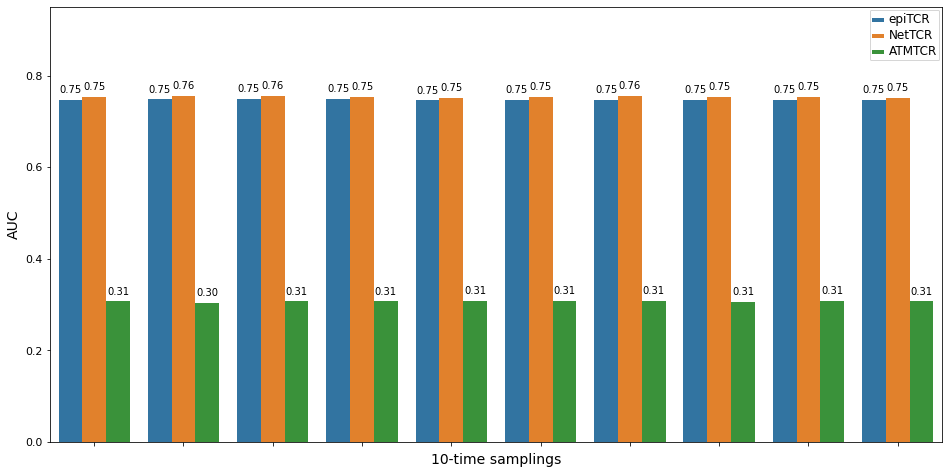

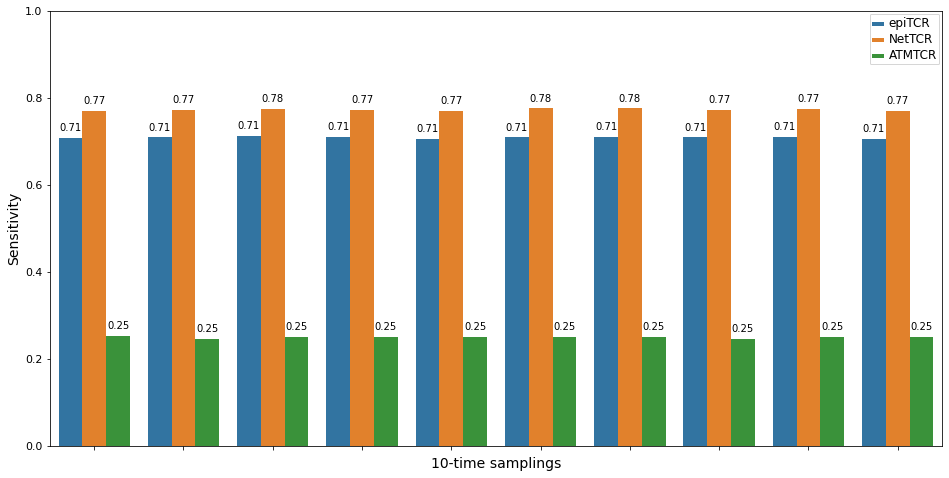

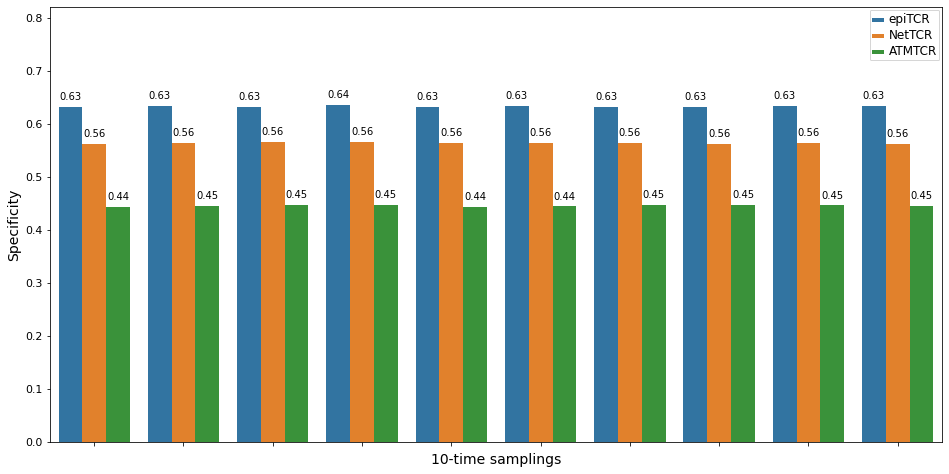

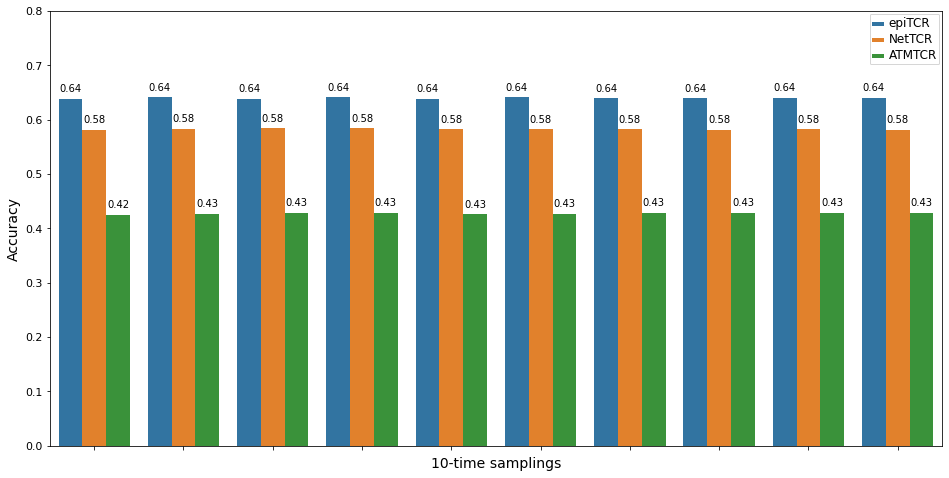

In [29]:
time_samplings = ['1st sampling', '2nd sampling', '3rd sampling', '4th sampling', '5th sampling', 
'6th sampling', '7th sampling', '8th sampling', '9th sampling', '10th sampling']

# AUC
tmp_dataset_auc_epiTCR_value = tmp_dataset_auc['epiTCR'].values
tmp_dataset_auc_NetTCR_value = tmp_dataset_auc['NetTCR'].values
tmp_dataset_auc_ATMTCR_value = tmp_dataset_auc['ATMTCR'].values

df_auc = pd.DataFrame({"time_samplings":time_samplings,"epiTCR":tmp_dataset_auc_epiTCR_value, "NetTCR":tmp_dataset_auc_NetTCR_value, 'ATMTCR': tmp_dataset_auc_ATMTCR_value})
df_auc = pd.melt(df_auc, id_vars="time_samplings")

# Sensitivity
tmp_dataset_sens_epiTCR_value = tmp_dataset_sens['epiTCR'].values
tmp_dataset_sens_NetTCR_value = tmp_dataset_sens['NetTCR'].values
tmp_dataset_sens_ATMTCR_value = tmp_dataset_sens['ATMTCR'].values

df_sens = pd.DataFrame({"time_samplings":time_samplings,"epiTCR":tmp_dataset_sens_epiTCR_value, "NetTCR":tmp_dataset_sens_NetTCR_value, 'ATMTCR': tmp_dataset_sens_ATMTCR_value})
df_sens = pd.melt(df_sens, id_vars="time_samplings")

# Specificity
tmp_dataset_spec_epiTCR_value = tmp_dataset_spec['epiTCR'].values
tmp_dataset_spec_NetTCR_value = tmp_dataset_spec['NetTCR'].values
tmp_dataset_spec_ATMTCR_value = tmp_dataset_spec['ATMTCR'].values

df_spec = pd.DataFrame({"time_samplings":time_samplings,"epiTCR":tmp_dataset_spec_epiTCR_value, "NetTCR":tmp_dataset_spec_NetTCR_value, 'ATMTCR': tmp_dataset_spec_ATMTCR_value})
df_spec = pd.melt(df_spec, id_vars="time_samplings")

# Accuracy
tmp_dataset_acc_epiTCR_value = tmp_dataset_acc['epiTCR'].values
tmp_dataset_acc_NetTCR_value = tmp_dataset_acc['NetTCR'].values
tmp_dataset_acc_ATMTCR_value = tmp_dataset_acc['ATMTCR'].values

df_acc = pd.DataFrame({"time_samplings":time_samplings,"epiTCR":tmp_dataset_acc_epiTCR_value, "NetTCR":tmp_dataset_acc_NetTCR_value, 'ATMTCR': tmp_dataset_acc_ATMTCR_value})
df_acc = pd.melt(df_acc, id_vars="time_samplings")

def ploting(df, metric, ylim, save_name):
    plt.rcParams["figure.figsize"] = (16,8)
    fig,ax = plt.subplots(1)

    splot = sns.barplot(data=df, x="time_samplings", y="value", hue="variable")
    plt.legend(loc='best', prop={'size': 6}, fontsize=11)

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), size=10,
                    textcoords = 'offset points')
    plt.ylim(ylim)
    ax.set_xticklabels([])
    plt.xlabel('10-time samplings', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.setp(ax.get_legend().get_texts(), fontsize='12') 
    plt.setp(ax.get_legend().get_title(), fontsize='12') 
    plt.savefig(save_name)
    plt.show()

ploting(df_auc, 'AUC', [0.0, 0.95],          '../../analysis/figures/epiTCRNetTCRATMTCRon10Subsamling.png')
ploting(df_sens, 'Sensitivity', [0.0, 1.0],  '../../analysis/figures/epiTCRNetTCRATMTCRon10Subsamling.png')
ploting(df_spec, 'Specificity', [0.0, 0.82], '../../analysis/figures/epiTCRNetTCRATMTCRon10Subsamling.png')
ploting(df_acc, 'Accuracy', [0.0, 0.80],     '../../analysis/figures/epiTCRNetTCRATMTCRon10Subsamling.png')